# MFC: Task - 2:

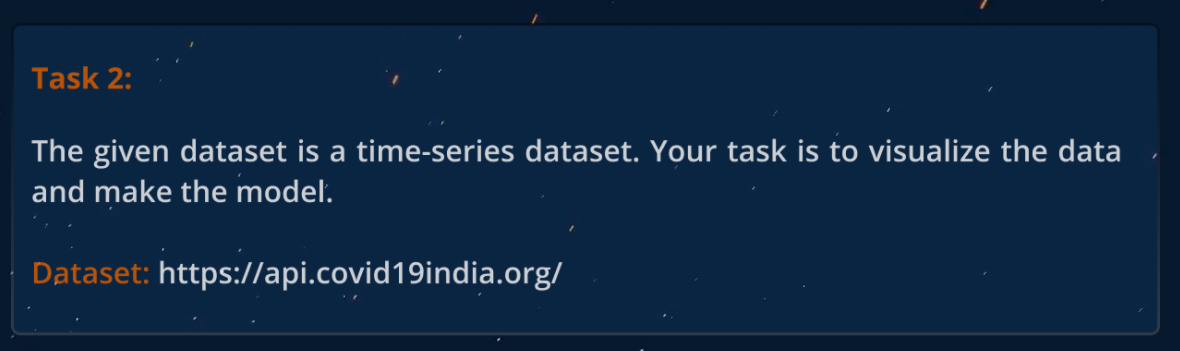

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('D:\PROGRAMMING_STUFF\Sample CSV files\case_time_series.csv')

In [3]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan-20,30-01-2020,1,1,0,0,0,0
1,31-Jan-20,31-01-2020,0,1,0,0,0,0
2,01-Feb-20,01-02-2020,0,1,0,0,0,0
3,02-Feb-20,02-02-2020,1,2,0,0,0,0
4,03-Feb-20,03-02-2020,1,3,0,0,0,0


In [4]:
X = range(543)

In [5]:
df.isna().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [6]:
x1 = df['Daily Confirmed']
y1 = df['Daily Recovered']
z1 = df['Daily Deceased']

x2 = df['Total Confirmed']
y2 = df['Total Recovered']
z2 = df['Total Deceased']


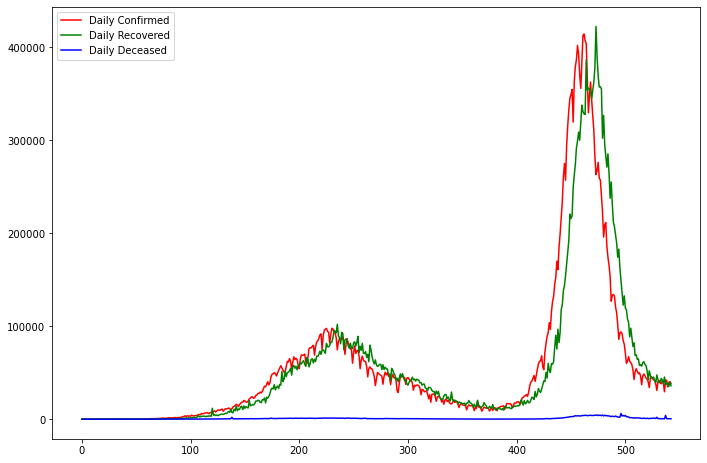

In [7]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.5,1.5])

myaxes.plot(X,x1,'r', label='Daily Confirmed')
myaxes.plot(X,y1,'g', label='Daily Recovered')
myaxes.plot(X,z1,'b', label='Daily Deceased')
myaxes.legend()
plt.show()

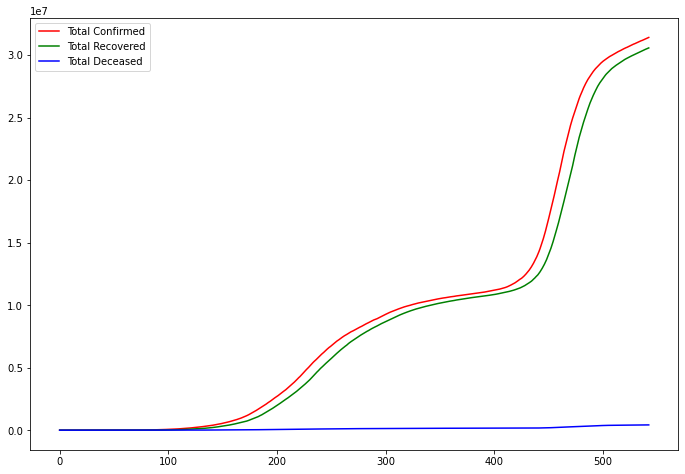

In [8]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.5,1.5])

myaxes.plot(X,x2,'r', label='Total Confirmed')
myaxes.plot(X,y2,'g', label='Total Recovered')
myaxes.plot(X,z2,'b', label='Total Deceased')
myaxes.legend()
plt.show()

> Data Visualization using Pandas-profiling:

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file = 'case_time_series.html')

In [9]:
df = df.drop(['Date','Date_YMD'],axis=1)

In [10]:
df = df.astype('float32')

In [11]:
# convert dataframe to a numpy array:

data = df.to_numpy()

In [12]:
data.shape

(543, 6)

In [13]:
#Spliting data into testing and training data:
training = data[:450]
testing = data[450:]

In [14]:
print(training.shape)
print(testing.shape)

(450, 6)
(93, 6)


In [15]:
# Seperate true labels from trainig and testing datasets:
training_features = training[:,0:-1]
testing_features = testing[:,0:-1]
training_labels = training[:,-1]
testing_labels = testing[:,-1]

In [16]:
# Input Layer:
training_features[0].shape

(5,)

In [17]:
training_features[0]

array([1., 1., 0., 0., 0.], dtype=float32)

> # Building the Model:

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Model Definition:

model = Sequential()

model.add(Dense(30, activation='relu', input_shape=(5,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1)) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics=['accuracy'])

In [ ]:
model.fit(training_features, training_labels, epochs=25, validation_data=(testing_features,testing_labels))

In [21]:
model.fit(training_features, training_labels, epochs=5, validation_split=0.2)

Epoch 1/5
12/12 [==============================] - 1s 20ms/step - loss: 58577801216.0000 - accuracy: 0.1028 - val_loss: 8288915968.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 0s 6ms/step - loss: 863994240.0000 - accuracy: 0.1111 - val_loss: 3836456448.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 0s 6ms/step - loss: 288511296.0000 - accuracy: 0.1167 - val_loss: 995631680.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 0s 6ms/step - loss: 105329360.0000 - accuracy: 0.1167 - val_loss: 229737680.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
12/12 [==============================] - 0s 7ms/step - loss: 108401184.0000 - accuracy: 0.1167 - val_loss: 143829952.0000 - val_accuracy: 0.0000e+00
